<a href="https://colab.research.google.com/github/hemangsengar/Gamma-Prediction---Machine-Learning/blob/main/magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
# prompt: import numpy,panda,matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

pd.read_csv('magic04.data')


,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [282]:
cols = ["fLength", "fwidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long","fM3Trans", "fAlpha","fDist","class"]
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fwidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [283]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [284]:
df["class"] = (df["class"] == "g").astype(int)


In [285]:
df.head()



,fLength,fwidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


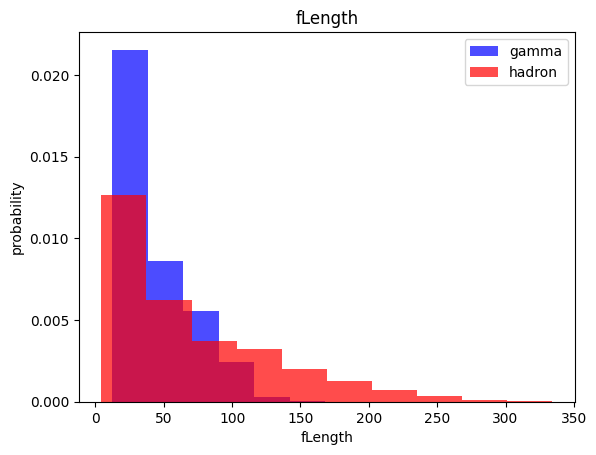

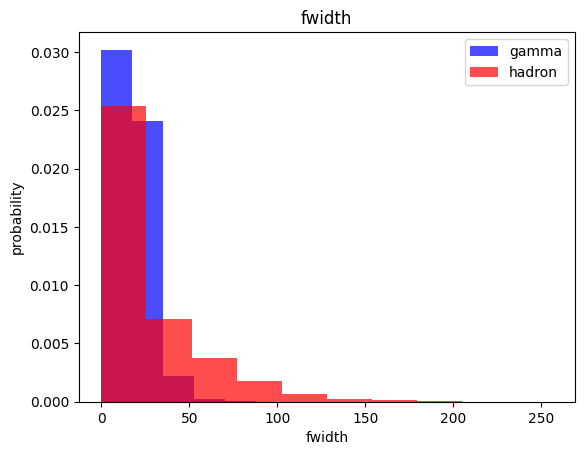

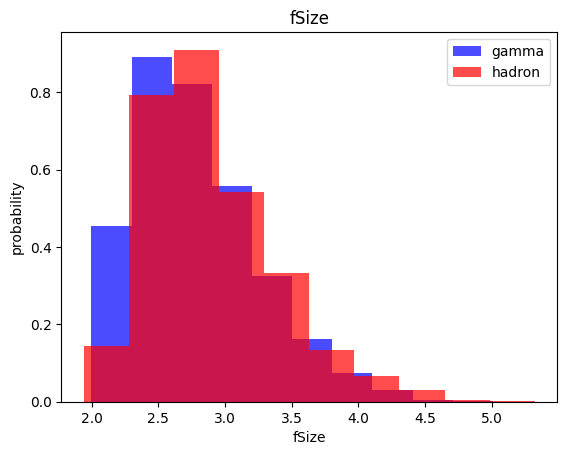

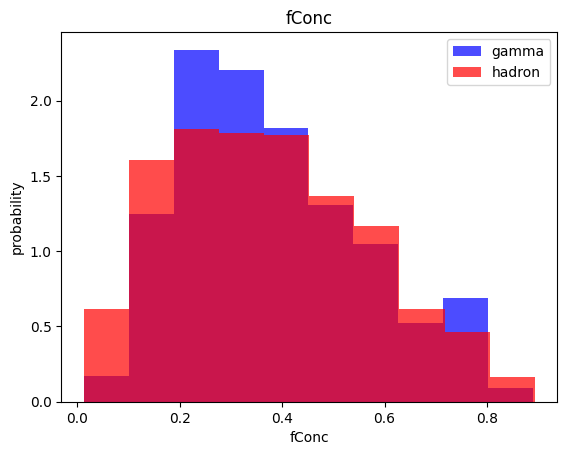

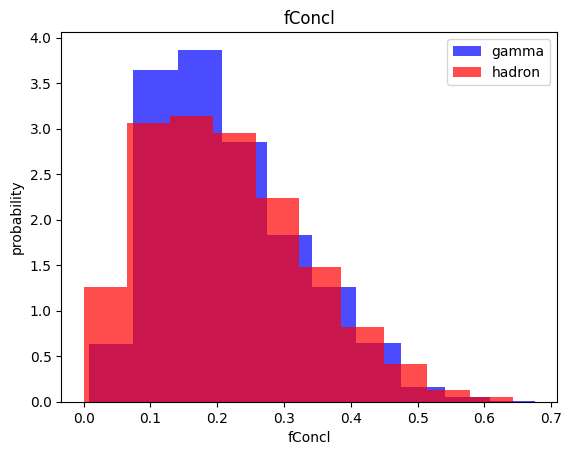

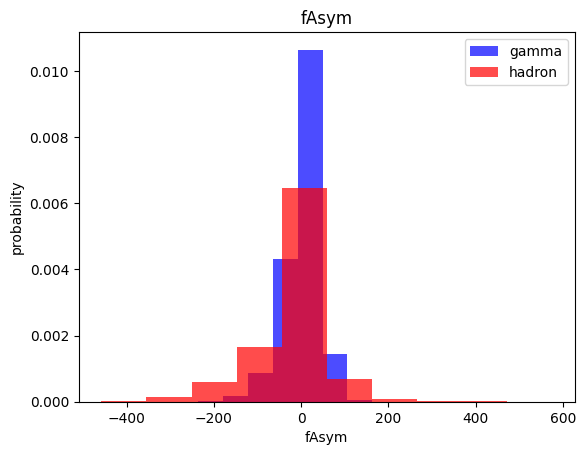

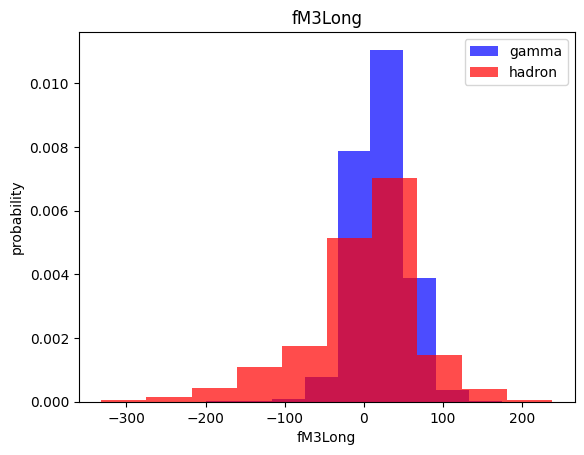

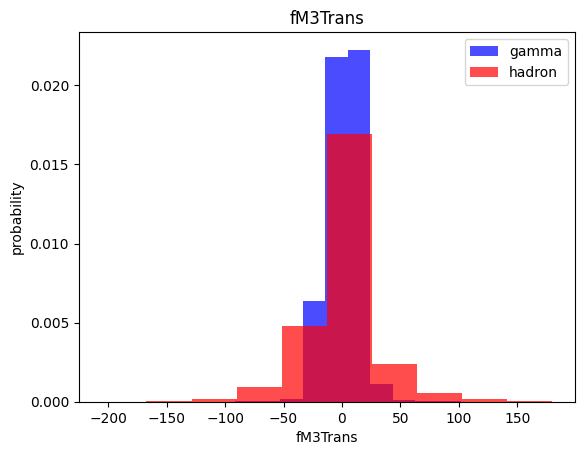

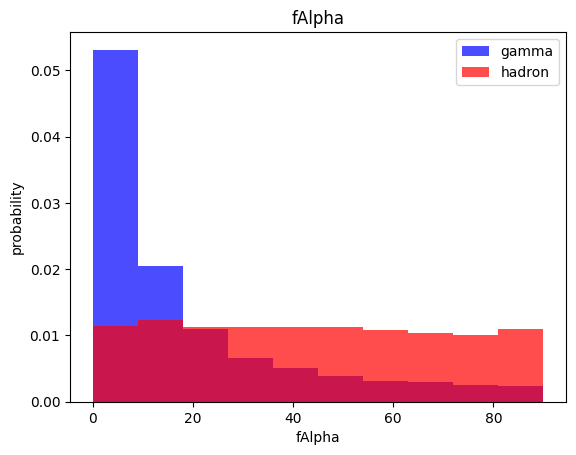

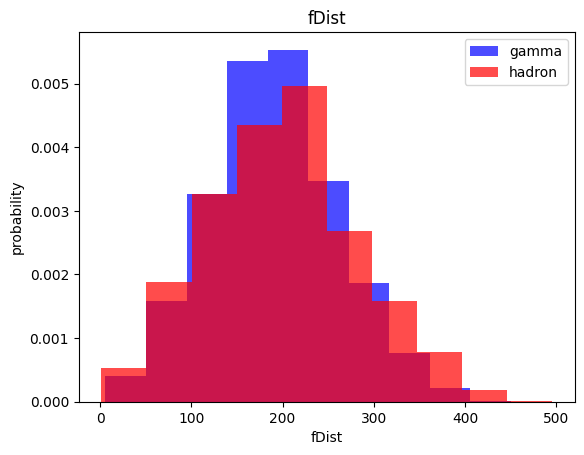

In [286]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel('probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()


Train,Valid,test

In [287]:
train,valid,test=np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

In [288]:
def scale_dataset(dataframe,oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values

  scaler =StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,Y = ros.fit_resample(X,Y)
  data = np.hstack((X,np.reshape(Y,(-1,1))))
  return data,X,Y


In [289]:
len(Y_train)

14980

In [290]:
sum(Y_train ==1)

7490

In [291]:
sum(Y_train ==0)

7490

In [292]:
train, X_train,Y_train = scale_dataset(train, oversample=True)
train, X_valid,Y_valid = scale_dataset(valid, oversample=False)
train, X_test,Y_test = scale_dataset(test, oversample=False)

K-NN

In [306]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [305]:
knn_model =KNeighborsClassifier(n_neighbors=100)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=100)

In [307]:
Y_pred = knn_model.predict(X_test)


In [296]:
Y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [297]:
Y_test

array([1, 1, 1, ..., 1, 0, 1])

In [298]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1356
           1       0.85      0.90      0.87      2448

    accuracy                           0.83      3804
   macro avg       0.82      0.80      0.81      3804
weighted avg       0.83      0.83      0.83      3804



Naive Bayes


In [299]:
from sklearn.naive_bayes import GaussianNB

In [300]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,Y_train)

In [301]:
y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1356
           1       0.85      0.90      0.87      2448

    accuracy                           0.83      3804
   macro avg       0.82      0.80      0.81      3804
weighted avg       0.83      0.83      0.83      3804



Logical Regression

In [302]:
from sklearn.linear_model import LogisticRegression

In [309]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,Y_train)


In [311]:
Y_pred = lg_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1356
           1       0.83      0.82      0.83      2448

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804

